Script for the program 'CLP_vs_Copper.py' in Python<br>
Licensed under the Apache License, Version 2.0<br>
http://www.apache.org/licenses/LICENSE-2.0

The program bla bla bla...

In [2]:
# Import Python libraries (pandas for data, matplotlib.pyplot for data plots,
# matplotlib.image for image plots and statsmodels.formula.api for statistics)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import statsmodels.formula.api as smf

First we observe from a graph of Bloomberg that the Chilean peso seems to have decoupled from copper prices after the Chilean civil unrest of October 2019:

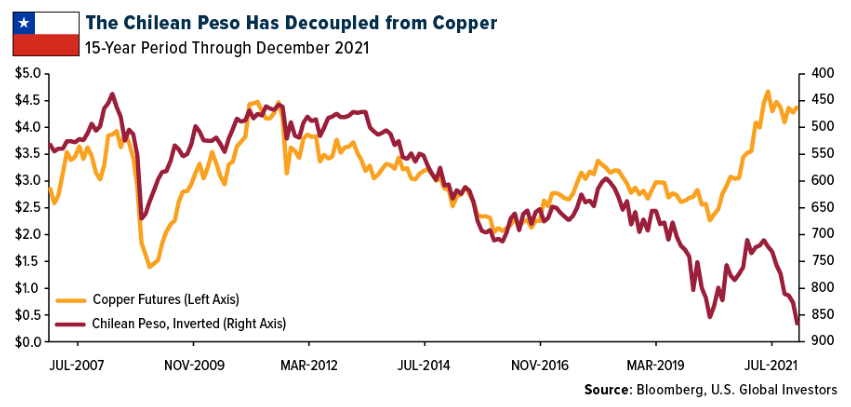

In [3]:
chart = img.imread('Bloomberg.png')
plt.figure(figsize=(15, 15))
plt.imshow(chart)
plt.axis('off')
plt.show()

From investing.com website:

https://www.investing.com/currencies/usd-clp-historical-data<br>
https://www.investing.com/commodities/copper-historical-data

one can download csv files which contain the data of the currency pair USD-CLP and the copper price before the civil unrest, during the time frame Oct 06, 2017 - Oct 04, 2019.

In [4]:
# Store the csv files in dataframes pesos_before and copper_before, and order them by ascending date

pesos_before = pd.read_csv('CLP_before.csv')
copper_before = pd.read_csv('Copper_before.csv')
pesos_before, copper_before = pesos_before[::-1], copper_before[::-1]

In [6]:
# Merge the data into one dataframe 'df_before', with 'Date' as (inner) merge criterion

df_before = pd.merge(left=pesos_before, right=copper_before, left_on='Date', right_on='Date')
df_before = [df_before['Date'], df_before['Price_x'], df_before['Price_y']]
headers = ['Date', 'USD_CLP', 'Copper_price']
df_before = pd.concat(df_before, axis=1, keys=headers)

Now we perform an ordinary least squares regression (OLS) between 'USD-CLP' and 'Copper price'. First an OLS object is generated, and then the fit() method is applied for fitting the regression line to the data. See more details on:

https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/<br>
https://en.wikipedia.org/wiki/Ordinary_least_squares

In [15]:
# The attribute 'params' returns the list of estimated parameters for the model.
# These are the intercept and the slope of the OLS regression, params[0] and params[1], respectively.

fit_before = smf.ols(formula='USD_CLP~Copper_price', data=df_before).fit()
intercept_before, slope_before = fit_before.params[0], fit_before.params[1]

In [16]:
# Equation of OLS regression (with column 'Best_fit'), and error between the 'Best_fit' and the observed data 'USD_CLP'

df_before['Best_fit'] = slope_before*df_before['Copper_price'] + intercept_before
df_before['Error'] = df_before['USD_CLP'] - df_before['Best_fit']
error_before = round((df_before['Error']**2).sum(), 1)
print(df_before.head())

           Date  USD_CLP  Copper_price    Best_fit     Error
0  Oct 06, 2017   633.22        3.1135  636.494462 -3.274462
1  Oct 09, 2017   633.40        3.1170  635.989263 -2.589263
2  Oct 10, 2017   629.55        3.1480  631.514648 -1.964648
3  Oct 11, 2017   626.75        3.1775  627.256547 -0.506547
4  Oct 12, 2017   624.47        3.2020  623.720158  0.749842


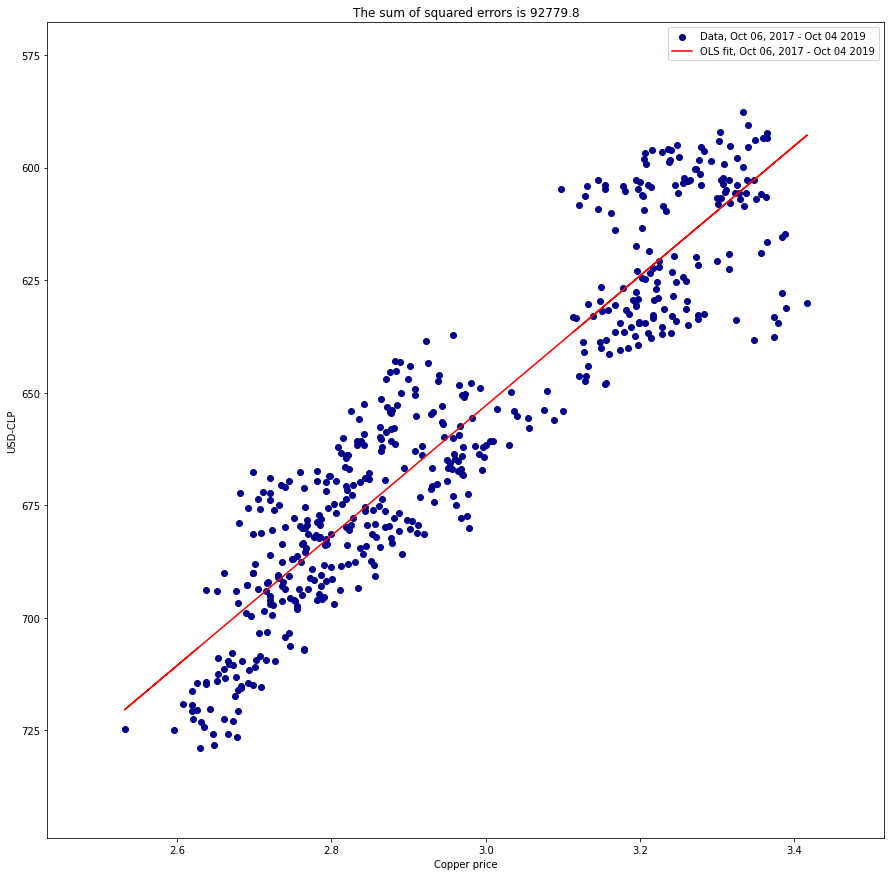

In [17]:
# Plot of the scattered data, the OLS regression, and the sum of squared errors

plt.figure(figsize=(15, 15))
plt.title('The sum of squared errors is {}'.format(error_before))
plt.scatter(df_before['Copper_price'], df_before['USD_CLP'], color='darkblue', label='Data, Oct 06, 2017 - Oct 04 2019')
plt.plot(df_before['Copper_price'], df_before['Best_fit'], color='red',
label='OLS fit, Oct 06, 2017 - Oct 04 2019')
plt.xlim(df_before['Copper_price'].min()-0.1, df_before['Copper_price'].max()+0.1)
plt.ylim(df_before['USD_CLP'].max()+20, df_before['USD_CLP'].min()-20)
plt.xlabel("Copper price")
plt.ylabel("USD-CLP")
plt.legend()
plt.show()

In [21]:
# We give with .summary() a summary of the performance of the model before the civil unrest.
# Contains the p-value of 'Copper_price', the confidence interval and the coefficient of determination R-squared.

fit_before.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                USD_CLP   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     2996.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):          1.22e-215
Time:                        14:06:10   Log-Likelihood:                -2057.6
No. Observations:                 512   AIC:                             4119.
Df Residuals:                     510   BIC:                             4128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1085.9046      7.831    138.663      0.000    1070.519    1101.290
Copper_price  -144.3424      2.637    -54.735      0.000    -149.523    -139.162
==============================================================================
Omnibus:                        8.791   Durbin-Watson:                   0.132
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                5.680
Skew:                          -0.091   Prob(JB):                       0.0584
Kurtosis:                       2.517   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We do now the same analysis for the observed data after the civil unrest, during the time frame Oct 08, 2019 - Oct 08 2021.

In [23]:
# Store the csv files in dataframes pesos_after and copper_after, and order them by ascending date

pesos_after = pd.read_csv('CLP_after.csv')
copper_after = pd.read_csv('Copper_after.csv')
pesos_after, copper_after = pesos_after[::-1], copper_after[::-1]

In [24]:
# Merge the data into one dataframe 'df_after', with 'Date' as (inner) merge criterion

df_after = pd.merge(left=pesos_after, right=copper_after, left_on='Date', right_on='Date')
df_after = [df_after['Date'], df_after['Price_x'], df_after['Price_y']]
headers = ['Date', 'USD_CLP', 'Copper_price']
df_after = pd.concat(df_after, axis=1, keys=headers)

In [25]:
# The attribute 'params' returns the list of estimated parameters for the model.
# These are the intercept and the slope of the OLS regression, params[0] and params[1], respectively.

fit_after = smf.ols(formula='USD_CLP~Copper_price', data=df_after).fit()
intercept_after, slope_after = fit_after.params[0], fit_after.params[1]

In [26]:
# Equation of OLS regression (with column 'Best_fit'), and error between the 'Best_fit' and the observed data 'USD_CLP'

df_after['Best_fit'] = slope_after*df_after['Copper_price'] + intercept_after
df_after['Error'] = df_after['USD_CLP'] - df_after['Best_fit']
error_after = round((df_after['Error']**2).sum(), 1)
print(df_after.head())

           Date  USD_CLP  Copper_price    Best_fit      Error
0  Oct 08, 2019   725.24        2.6350  793.044021 -67.804021
1  Oct 09, 2019   723.20        2.6315  793.168131 -69.968131
2  Oct 10, 2019   718.48        2.6720  791.732003 -73.252003
3  Oct 11, 2019   709.48        2.6890  791.129184 -81.649184
4  Oct 14, 2019   712.43        2.6950  790.916425 -78.486425


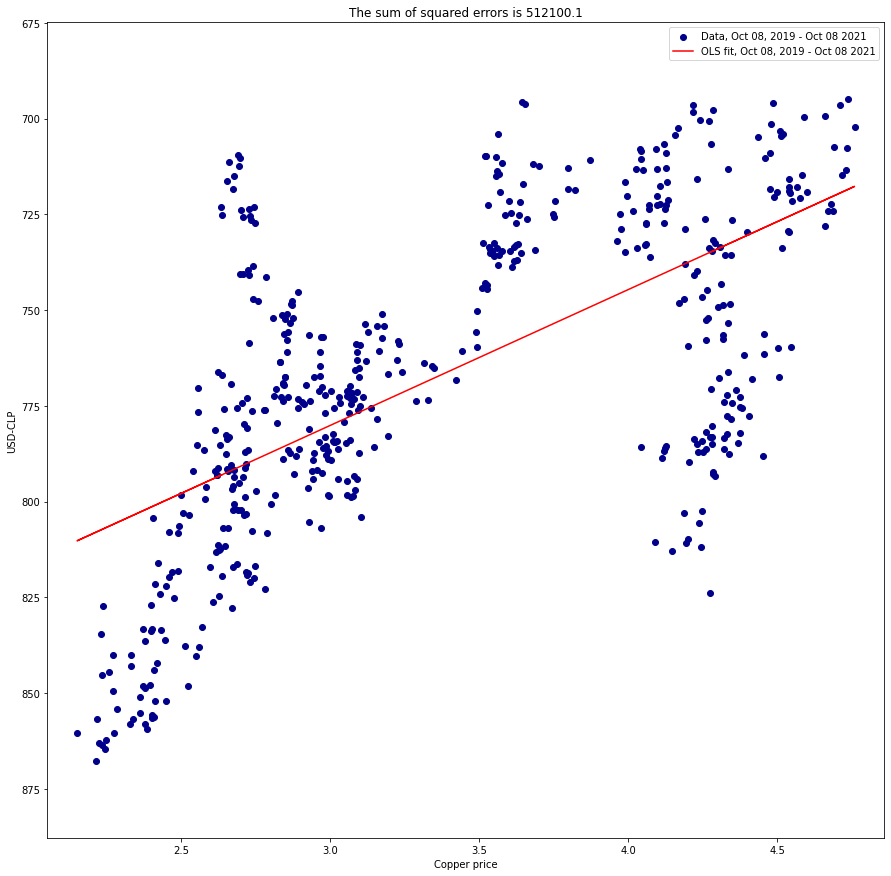

In [27]:
# Plot of the scattered data, the OLS regression, and the sum of squared errors

plt.figure(figsize=(15, 15))
plt.title('The sum of squared errors is {}'.format(error_after))
plt.scatter(df_after['Copper_price'], df_after['USD_CLP'], color='darkblue', label='Data, Oct 08, 2019 - Oct 08 2021')
plt.plot(df_after['Copper_price'], df_after['Best_fit'], color='red',
label='OLS fit, Oct 08, 2019 - Oct 08 2021')
plt.xlim(df_after['Copper_price'].min()-0.1, df_after['Copper_price'].max()+0.1)
plt.ylim(df_after['USD_CLP'].max()+20, df_after['USD_CLP'].min()-20)
plt.xlabel("Copper price")
plt.ylabel("USD-CLP")
plt.legend()
plt.show()

In [28]:
# We give with .summary() a summary of the performance of the model after the civil unrest.
# Contains the p-value of 'Copper_price', the confidence interval and the coefficient of determination R-squared.

fit_after.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                USD_CLP   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     359.2
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           2.70e-61
Time:                        14:09:59   Log-Likelihood:                -2538.6
No. Observations:                 522   AIC:                             5081.
Df Residuals:                     520   BIC:                             5090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      886.4810      6.412    138.252      0.000     873.884     899.078
Copper_price   -35.4599      1.871    -18.953      0.000     -39.135     -31.784
==============================================================================
Omnibus:                        2.696   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.693
Skew:                           0.138   Prob(JB):                        0.260
Kurtosis:                       2.782   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""